In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
atributos = ["montante", "duracao", "historico_credito", 
              "proposito", "montante_credito", "poupanca",
              "tempo_empregado","taxa_parcelamento",
              "estado_civil_sexo","tipo_participacao_credito", 
              "tempo_moradia", "propriedade","idade",
              "gastos_adicionais", "habitacao","quantidade_creditos","emprego",
              "dependentes","telefone","trabalhador_estrangeiro","risco"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", delim_whitespace = True, header=None, names=atributos)

In [57]:
df['risco']

0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: risco, Length: 1000, dtype: int64

In [5]:
codigos_historico_de_creditos = {
    "A30": "nenhum credito recebido / todos os creditos devolvidos",
    "A31": "todos os creditos deste banco são reembolsados",
    "A32": "creditos existentes pagos ate agora",
    "A33": "atraso em pagar no passado",
    "A34": "conta crítica / outros créditos existentes não neste banco"
}

codigos_proposito = {
    "A40": "carro novo",
    "A41": "carro usado",
    "A42": "moveis / equipamentos",
    "A43": "radio/televisao",
    "A44": "eletrodomesticos",
    "A45": "reparos",
    "A46": "educacao",
    "A47": "ferias",
    "A48": "retraining",
    "A49": "negocios",
    "A410": "outros"
}

codigo_estado_civil_sexo = {
    "A91": "homem : divorced/separated",
    "A92": "mulher : divorced/separated/married",
    "A93": "homem : single",
    "A94": "homem : married/windowed",
    "A95": "mulher : single"
}

codigos_outros_devedores = {
    "A101": "Não possuí",
    "A102": "co-requerente",
    "A103": "fiador",
}

codigos_propriedade = {
    "A121": "imobiliaria",
    "A122": "seguro de vida",
    "A123": "carro",
    "A124": "desconhecido / sem propriedade"
}

codigos_planos_de_parcelamento = {
    "A141": "banco",
    "A142": "lojas",
    "A143": "unknown"
}

codigos_residencia = {
    "A151": "alugada",
    "A152": "propria",
    "A153": "de graça"
}

codigos_estado_emprego = {
    "A171": "desempregado / nao qualificado / nao residente",
    "A172": "residente nao qualificado",
    "A173": "funcionario qualificado",
    "A174": "gerência / trabalhador independente / altamente qualificado"
}

codigos_telefone = {
    "A191": "Nao",
    "A192": "Sim"
}

codigos_trabalhador_estrangeiro = {
    "A201": "Sim",
    "A202": "Nao"
}

In [6]:
codigos_status_atual_conta_corrente = {
    "A11": " Abaixo de 0",
    "A12": " Entre 0 e 199",
    "A13": "Acima ou igual a 200",
    "A14": "unknown"
}

codigos_reserva_poupanca = {
    "A61": "Abaixo de 100",
    "A62": "entre 100 e 499",
    "A63": "Entre 500 a 999",
    "A64": "Maior 1000",
    "A65": "unknown"
}

codigos_tempo_emprego = {
    "A71": "Vazio",
    "A72": " Menos 12 meses", # Menos de 1 ano
    "A73": "Entre 12 e 48 meses", # Entre 1 ano e menos que 4 anos
    "A74": " Entre 48 e 84 meses", # Entre 4 anos e menos que 7 anos
    "A75": "Mais de 84 meses" # Mais de 7 anos
}


In [7]:
colunas_para_codigos = {
    "montante"             : codigos_status_atual_conta_corrente,
    "historico_credito"    : codigos_historico_de_creditos,
    "proposito"            : codigos_proposito,
    "poupanca"             : codigos_reserva_poupanca,
    "tempo_empregado"      : codigos_tempo_emprego,
    "estado_civil_sexo"    : codigo_estado_civil_sexo, 
    "tipo_participacao_credito"     : codigos_outros_devedores,
    "propriedade"          : codigos_propriedade,
    "gastos_adicionais": codigos_planos_de_parcelamento,
    "habitacao"            : codigos_residencia,
    "emprego"              : codigos_estado_emprego,
    "telefone"             : codigos_telefone,
    "trabalhador_estrangeiro"  : codigos_trabalhador_estrangeiro
}

In [8]:
df.replace(colunas_para_codigos,inplace=True)

In [9]:
df.head(3)

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,Abaixo de 0,6,conta crítica / outros créditos existentes não...,radio/televisao,1169,unknown,Mais de 84 meses,4,homem : single,Não possuí,...,imobiliaria,67,unknown,propria,2,funcionario qualificado,1,Sim,Sim,1
1,Entre 0 e 199,48,creditos existentes pagos ate agora,radio/televisao,5951,Abaixo de 100,Entre 12 e 48 meses,2,mulher : divorced/separated/married,Não possuí,...,imobiliaria,22,unknown,propria,1,funcionario qualificado,1,Nao,Sim,2
2,unknown,12,conta crítica / outros créditos existentes não...,educacao,2096,Abaixo de 100,Entre 48 e 84 meses,2,homem : single,Não possuí,...,imobiliaria,49,unknown,propria,1,residente nao qualificado,2,Nao,Sim,1


In [10]:
df.dtypes

montante                     object
duracao                       int64
historico_credito            object
proposito                    object
montante_credito              int64
poupanca                     object
tempo_empregado              object
taxa_parcelamento             int64
estado_civil_sexo            object
tipo_participacao_credito    object
tempo_moradia                 int64
propriedade                  object
idade                         int64
gastos_adicionais            object
habitacao                    object
quantidade_creditos           int64
emprego                      object
dependentes                   int64
telefone                     object
trabalhador_estrangeiro      object
risco                         int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
montante                     1000 non-null object
duracao                      1000 non-null int64
historico_credito            1000 non-null object
proposito                    1000 non-null object
montante_credito             1000 non-null int64
poupanca                     1000 non-null object
tempo_empregado              1000 non-null object
taxa_parcelamento            1000 non-null int64
estado_civil_sexo            1000 non-null object
tipo_participacao_credito    1000 non-null object
tempo_moradia                1000 non-null int64
propriedade                  1000 non-null object
idade                        1000 non-null int64
gastos_adicionais            1000 non-null object
habitacao                    1000 non-null object
quantidade_creditos          1000 non-null int64
emprego                      1000 non-null object
dependentes                  1000 non-null int64
t

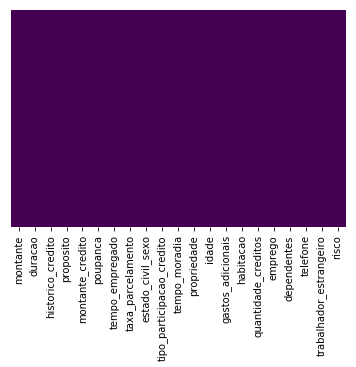

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
def criar_sexo_e_estado_civil(coluna):
    dados_separados = coluna.split(":")
    
    sexo = dados_separados[0].strip()
    estado_civil = dados_separados[1].strip()

    return pd.Series([sexo,estado_civil])

In [14]:
df[["sexo","estado_civil"]] = df["estado_civil_sexo"].apply(criar_sexo_e_estado_civil)

In [15]:
colunas = ["estado_civil_sexo"]
df = df.drop(colunas,axis=1)

In [16]:
df['montante'].value_counts()

unknown                 394
 Abaixo de 0            274
 Entre 0 e 199          269
Acima ou igual a 200     63
Name: montante, dtype: int64

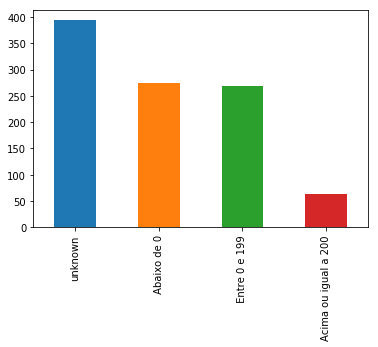

In [17]:
df['montante'].value_counts().plot.bar()

In [18]:
df['idade'].value_counts()

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: idade, dtype: int64

<Figure size 1440x864 with 0 Axes>

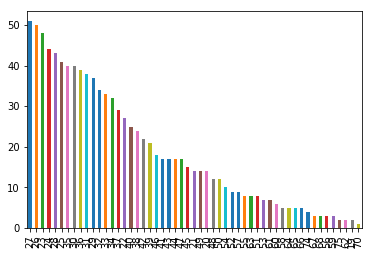

<Figure size 1440x864 with 0 Axes>

In [48]:
df['idade'].value_counts().plot.bar()


In [20]:
#Poupança
POU = df['poupanca']
set(POU)


{'Abaixo de 100',
 'Entre 500 a 999',
 'Maior 1000',
 'entre 100 e 499',
 'unknown'}

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Poupança'] = label_encoder.fit_transform(POU)
df['Poupança'].head()

0    4
1    0
2    0
3    0
4    0
Name: Poupança, dtype: int64

In [22]:
#Historico de crédito
HC = df['historico_credito']
set(HC)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['HC'] = label_encoder.fit_transform(HC)
df['HC'].head()

0    1
1    2
2    1
3    2
4    0
Name: HC, dtype: int64

In [23]:
PROPOSITO = df['proposito']
set(PROPOSITO)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Proposito'] = label_encoder.fit_transform(PROPOSITO)
df['Proposito'].head()

0    7
1    7
2    2
3    4
4    0
Name: Proposito, dtype: int64

In [24]:
#Tempo empregado
TE = df['tempo_empregado']
set(TE)

{' Entre 48 e 84 meses',
 ' Menos 12 meses',
 'Entre 12 e 48 meses',
 'Mais de 84 meses',
 'Vazio'}

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Tempo_empregado'] = label_encoder.fit_transform(TE)
df['Tempo_empregado'].head()

0    3
1    2
2    0
3    0
4    2
Name: Tempo_empregado, dtype: int64

In [26]:
#tipo_participacao_credito
TPC = df['tipo_participacao_credito']
set(TPC)

{'Não possuí', 'co-requerente', 'fiador'}

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Tipo_participação_crédito'] = label_encoder.fit_transform(TPC)
df['Tipo_participação_crédito'].head()

0    0
1    0
2    0
3    2
4    0
Name: Tipo_participação_crédito, dtype: int64

In [28]:
#Propriedade
PROPRIEDADE = df['propriedade']
set(PROPRIEDADE)

{'carro', 'desconhecido / sem propriedade', 'imobiliaria', 'seguro de vida'}

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Propriedade'] = label_encoder.fit_transform(PROPRIEDADE)
df['Propriedade'].head()

0    2
1    2
2    2
3    3
4    1
Name: Propriedade, dtype: int64

In [30]:
#gastos_adicionais
GA = df['gastos_adicionais']
set(GA)

{'banco', 'lojas', 'unknown'}

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gastos_Adicionais'] = label_encoder.fit_transform(GA)
df['Gastos_Adicionais'].head()

0    2
1    2
2    2
3    2
4    2
Name: Gastos_Adicionais, dtype: int64

In [32]:
#habitacao 
HA = df['habitacao']
set(HA)

{'alugada', 'de graça', 'propria'}

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Habitação'] = label_encoder.fit_transform(HA)
df['Habitação'].head()

0    2
1    2
2    2
3    1
4    1
Name: Habitação, dtype: int64

In [34]:
#Emprego
EM = df['emprego']
set(EM)

{'desempregado / nao qualificado / nao residente',
 'funcionario qualificado',
 'gerência / trabalhador independente / altamente qualificado',
 'residente nao qualificado'}

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Emprego'] = label_encoder.fit_transform(EM)
df['Emprego'].head()

0    1
1    1
2    3
3    1
4    1
Name: Emprego, dtype: int64

In [36]:
#Telefone
TEL = df['telefone']
set(TEL)

{'Nao', 'Sim'}

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Telefone'] = label_encoder.fit_transform(TEL)
df['Telefone'].head()

0    1
1    0
2    0
3    0
4    0
Name: Telefone, dtype: int64

In [38]:
#Trabalhador Estrageiro
TE = df['trabalhador_estrangeiro']
set(TE)


{'Nao', 'Sim'}

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Trabalhor_estrageiro'] = label_encoder.fit_transform(TE)
df['Trabalhor_estrageiro'].head()

0    1
1    1
2    1
3    1
4    1
Name: Trabalhor_estrageiro, dtype: int64

In [40]:
#Sexo
SE = df['sexo']
set(SE)

{'homem', 'mulher'}

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sexo'] = label_encoder.fit_transform(SE)
df['Sexo'].head()

0    0
1    1
2    0
3    0
4    0
Name: Sexo, dtype: int64

In [42]:
#estado_civil
EC = df['estado_civil']
set(EC)

{'divorced/separated',
 'divorced/separated/married',
 'married/windowed',
 'single'}

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Estado_Civil'] = label_encoder.fit_transform(EC)
df['Estado_Civil'].head()

0    3
1    1
2    3
3    3
4    3
Name: Estado_Civil, dtype: int64

In [44]:
df

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,tipo_participacao_credito,tempo_moradia,...,Tempo_empregado,Tipo_participação_crédito,Propriedade,Gastos_Adicionais,Habitação,Emprego,Telefone,Trabalhor_estrageiro,Sexo,Estado_Civil
0,Abaixo de 0,6,conta crítica / outros créditos existentes não...,radio/televisao,1169,unknown,Mais de 84 meses,4,Não possuí,4,...,3,0,2,2,2,1,1,1,0,3
1,Entre 0 e 199,48,creditos existentes pagos ate agora,radio/televisao,5951,Abaixo de 100,Entre 12 e 48 meses,2,Não possuí,2,...,2,0,2,2,2,1,0,1,1,1
2,unknown,12,conta crítica / outros créditos existentes não...,educacao,2096,Abaixo de 100,Entre 48 e 84 meses,2,Não possuí,3,...,0,0,2,2,2,3,0,1,0,3
3,Abaixo de 0,42,creditos existentes pagos ate agora,moveis / equipamentos,7882,Abaixo de 100,Entre 48 e 84 meses,2,fiador,4,...,0,2,3,2,1,1,0,1,0,3
4,Abaixo de 0,24,atraso em pagar no passado,carro novo,4870,Abaixo de 100,Entre 12 e 48 meses,3,Não possuí,4,...,2,0,1,2,1,1,0,1,0,3
5,unknown,36,creditos existentes pagos ate agora,educacao,9055,unknown,Entre 12 e 48 meses,2,Não possuí,4,...,2,0,1,2,1,3,1,1,0,3
6,unknown,24,creditos existentes pagos ate agora,moveis / equipamentos,2835,Entre 500 a 999,Mais de 84 meses,3,Não possuí,4,...,3,0,3,2,2,1,0,1,0,3
7,Entre 0 e 199,36,creditos existentes pagos ate agora,carro usado,6948,Abaixo de 100,Entre 12 e 48 meses,2,Não possuí,2,...,2,0,0,2,0,2,1,1,0,3
8,unknown,12,creditos existentes pagos ate agora,radio/televisao,3059,Maior 1000,Entre 48 e 84 meses,2,Não possuí,4,...,0,0,2,2,2,3,0,1,0,0
9,Entre 0 e 199,30,conta crítica / outros créditos existentes não...,carro novo,5234,Abaixo de 100,Vazio,4,Não possuí,2,...,4,0,0,2,2,2,0,1,0,2


Text(0.5,1,'Contagem do montante por tipo')

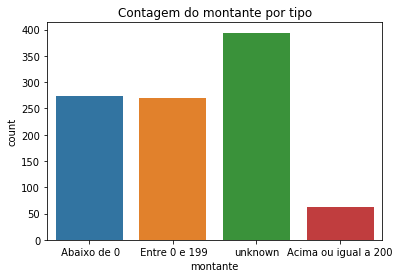

In [45]:
a = sns.countplot(x="montante",data=df)
a.set_title("Contagem do montante por tipo")

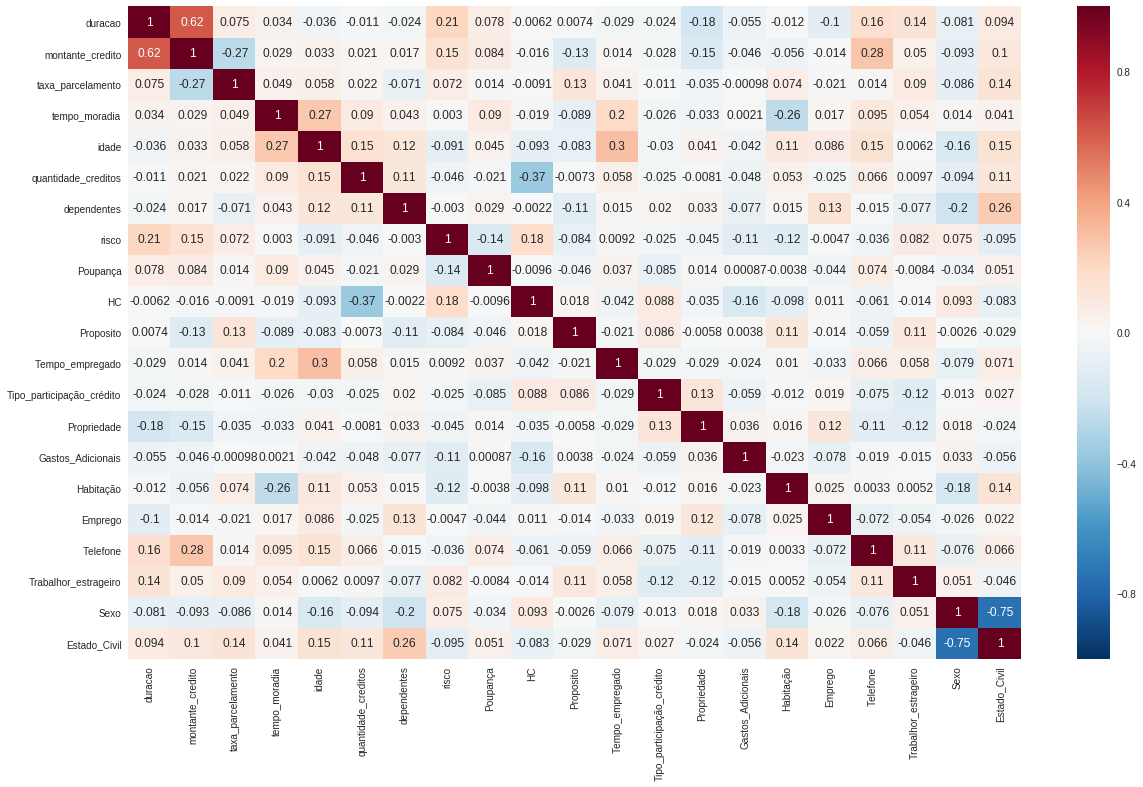

In [49]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True)

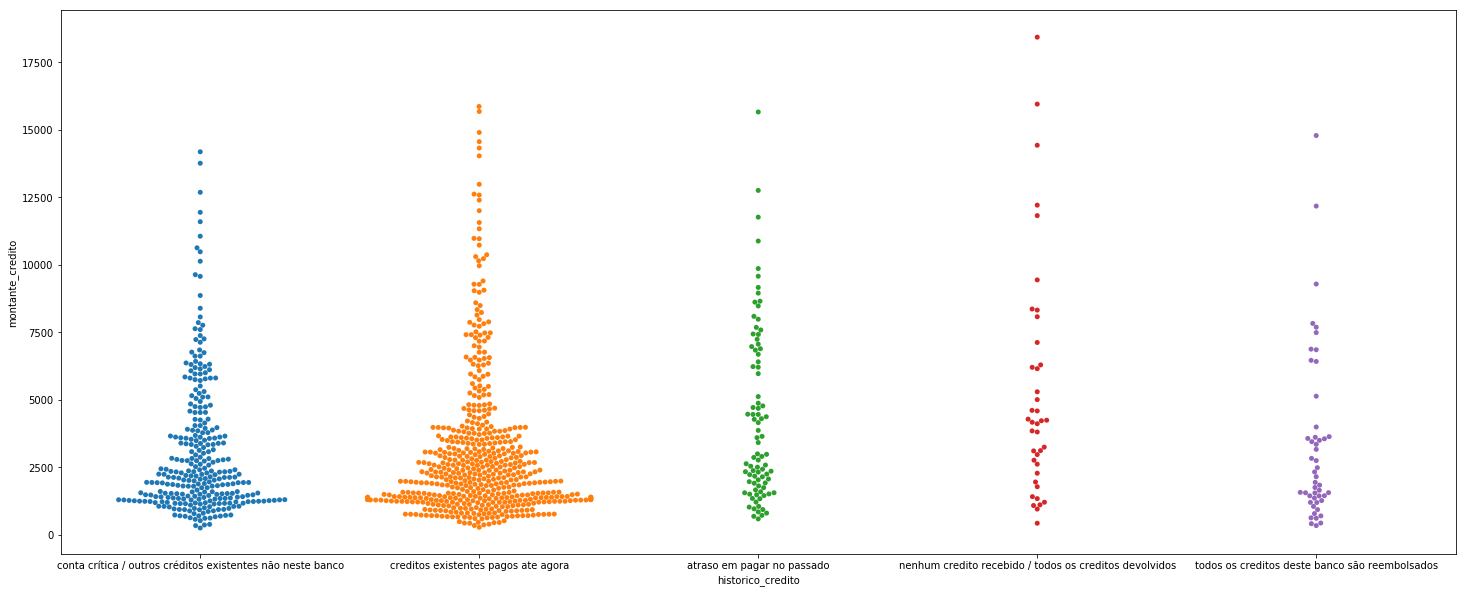

In [49]:
plt.figure(figsize=(25, 10))
sns.swarmplot(x="historico_credito",y="montante_credito",data=df)

C:\Users\pheli\Anaconda3.5.2.0\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


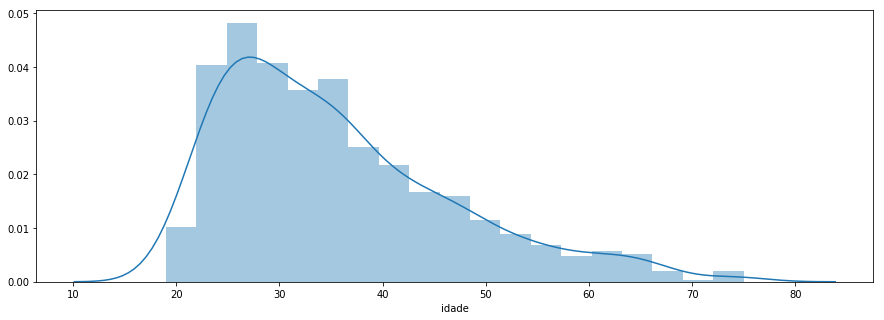

In [50]:
plt.figure(figsize=(15, 5))
sns.distplot(df.idade)

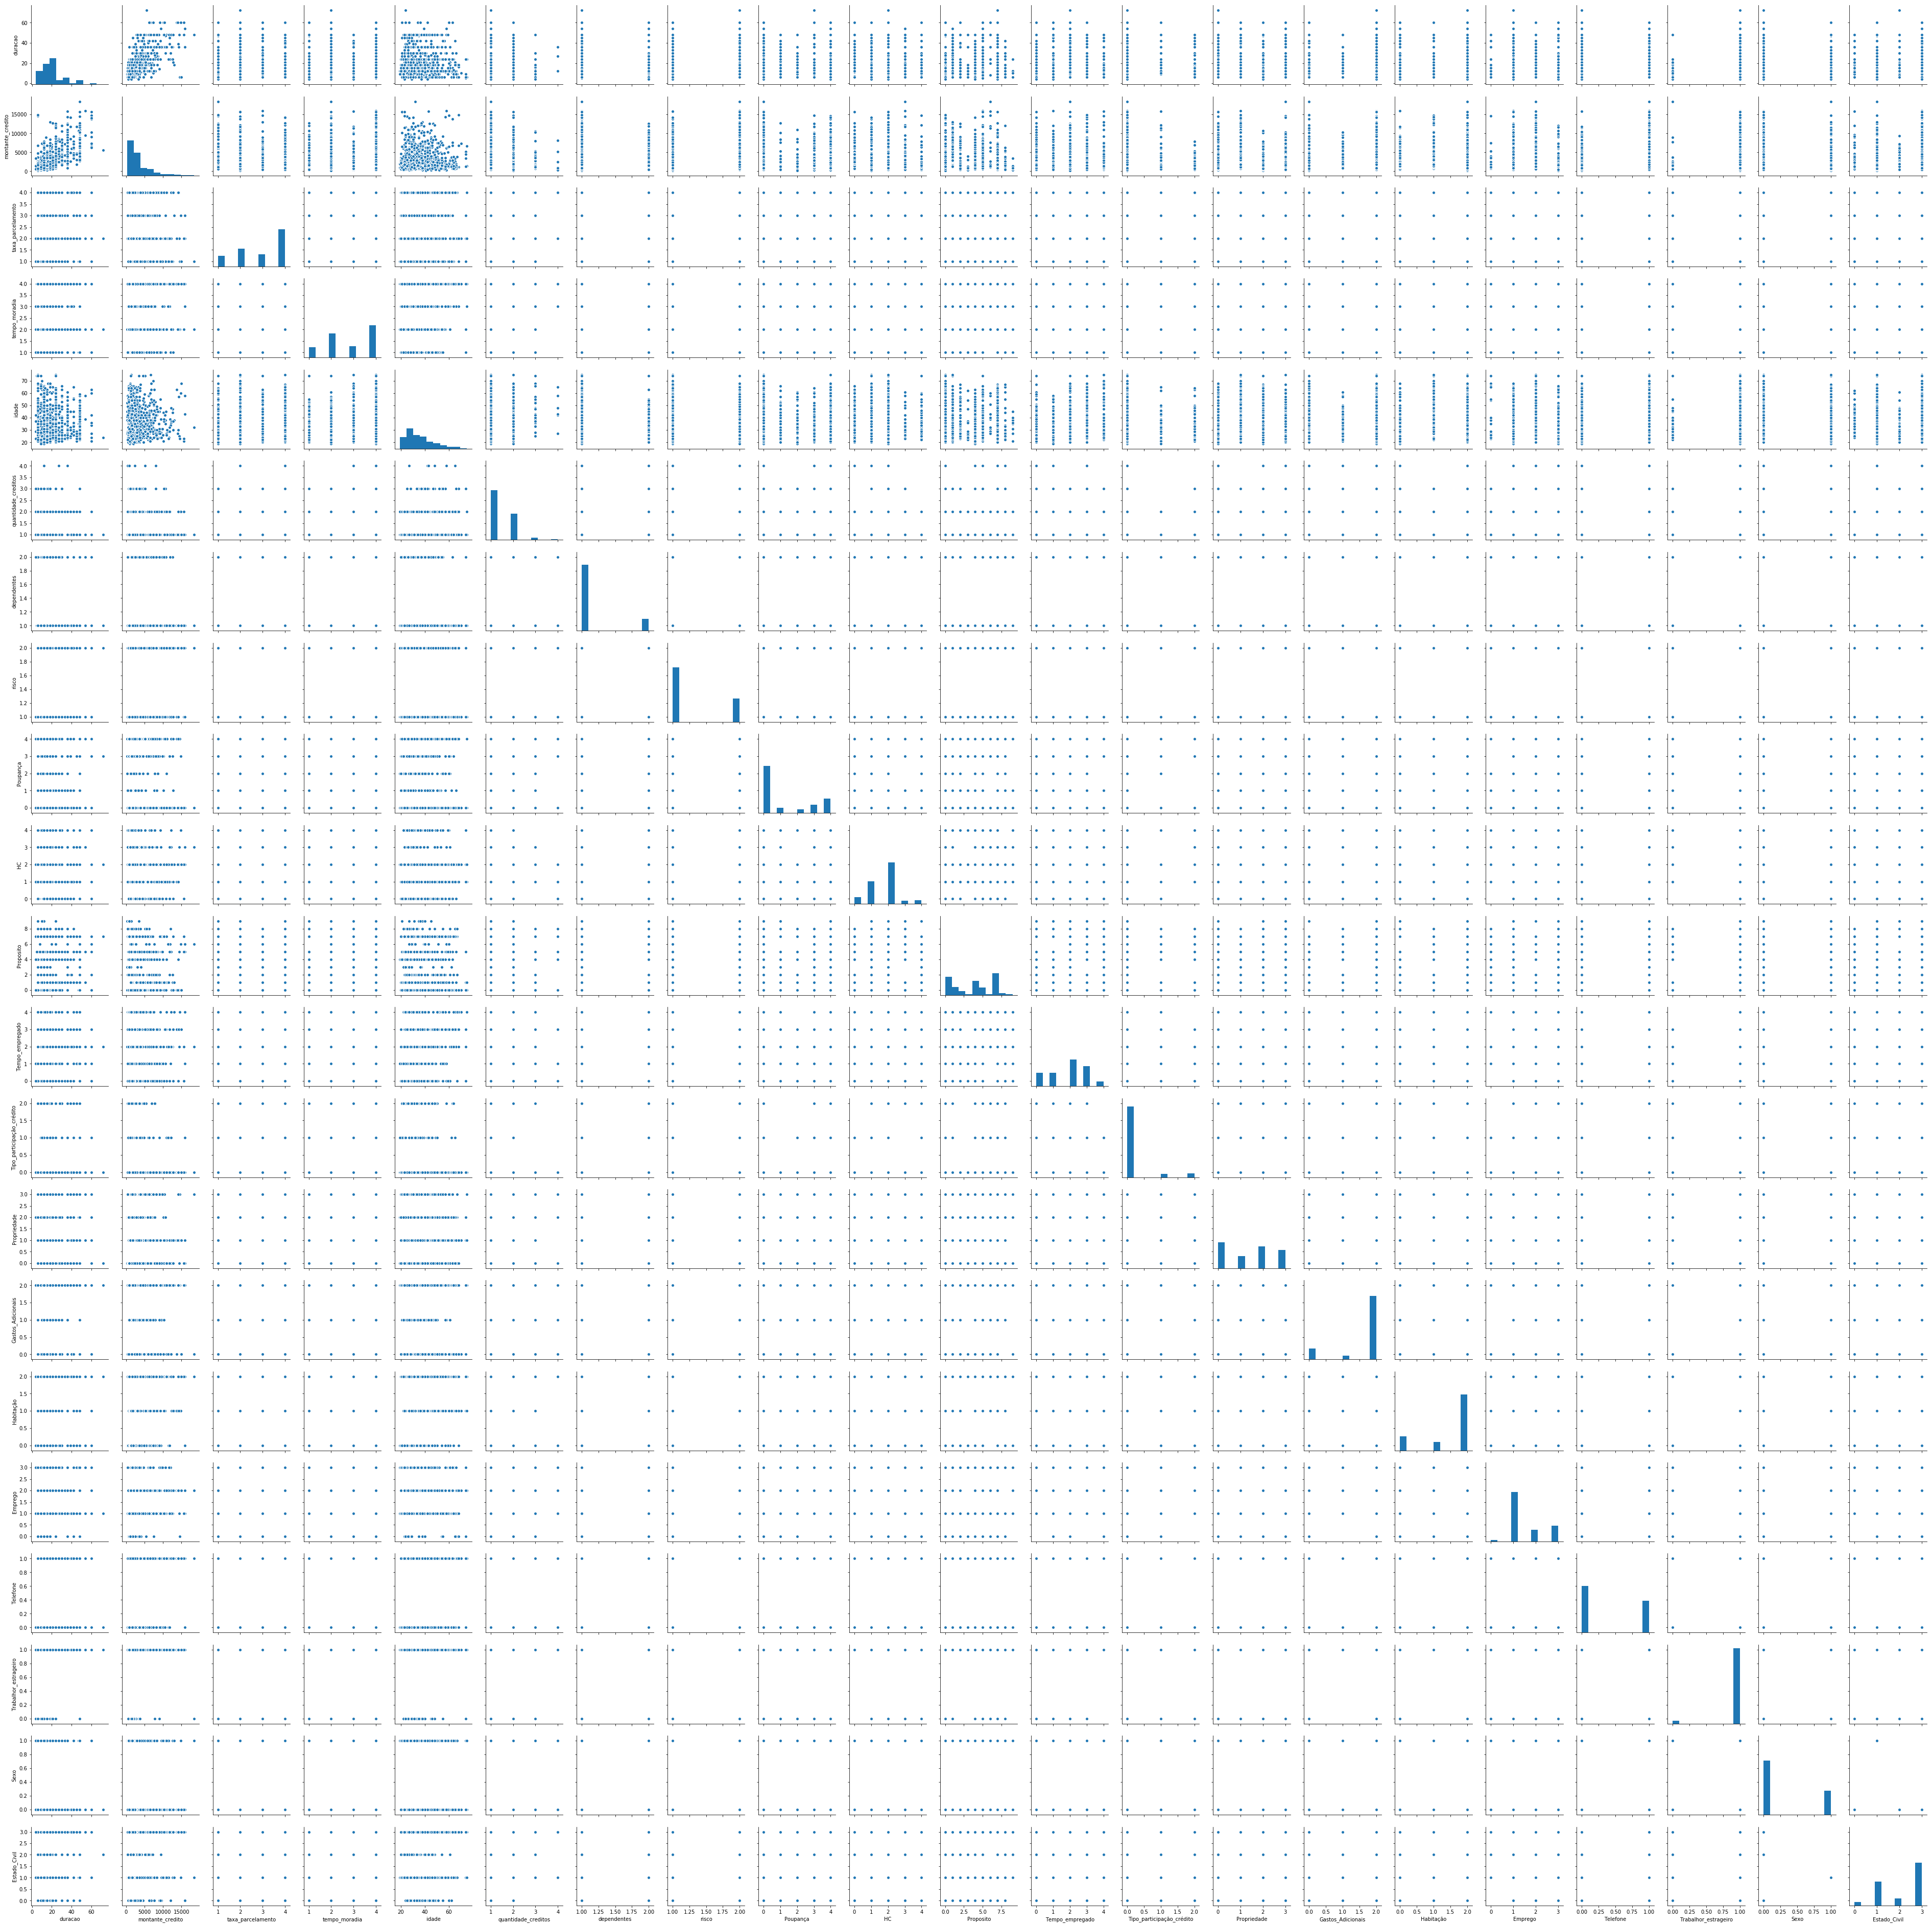

In [51]:
sns.pairplot(df)

In [52]:
def mapear_valores(coluna):
    valores = tuple(set(df[coluna].values))

    associados = tuple(range(len(valores)))

    data[coluna].replace(valores,associados,inplace=True)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = df.drop('risco', 1).values
y = df["risco"].values

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)


In [55]:
def aplicar_modelo(modelo, x_treino, y_treino, x_teste, y_teste):
    
    modelo.fit(x_treino,y_treino)
    
    risco = modelo.predict(x_teste)
    
    return accuracy_score(y_teste,risco)

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()

resultado = aplicar_modelo(naive,x_treino,y_treino, x_teste,y_teste)

ValueError: ignored

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
montante                     1000 non-null object
duracao                      1000 non-null int64
historico_credito            1000 non-null object
proposito                    1000 non-null object
montante_credito             1000 non-null int64
poupanca                     1000 non-null object
tempo_empregado              1000 non-null object
taxa_parcelamento            1000 non-null int64
tipo_participacao_credito    1000 non-null object
tempo_moradia                1000 non-null int64
propriedade                  1000 non-null object
idade                        1000 non-null int64
gastos_adicionais            1000 non-null object
habitacao                    1000 non-null object
quantidade_creditos          1000 non-null int64
emprego                      1000 non-null object
dependentes                  1000 non-null int64
telefone                     1000 non-null object
t

In [56]:
df.to_excel("Credit_risk.xls")